In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

# from matplotlib import rc
# rc('text', usetex=True)

from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.decomposition.pca import PCA

from IPython.display import display

%matplotlib inline

In [2]:
c = pd.read_csv("decennial_compactness.csv")

In [3]:
pca = PCA(n_components = 0.9, svd_solver = "full")
pca.fit(c.filter(regex = "^obj"))
print(pca.explained_variance_ratio_)

[ 0.69464538  0.14131356  0.05227658  0.03477805]


In [4]:
mod_cols = ['obj_ip_dist', 'obj_inertia_p', 'obj_lic', 'obj_scc', 'obj_inertia_a', 
            'obj_mean_radius', 'obj_dyn_radius', "obj_exchange", 'obj_rohrbach', 
            'obj_hull_area', 'obj_polsby', 'obj_harm_radius', 'obj_hull_pop']#, 'obj_axis']

pca_mod = PCA(n_components = 0.9, svd_solver = "full")
pca.fit(c[mod_cols])
print(pca.explained_variance_ratio_)

[ 0.72501746  0.14642163  0.04213902]


In [5]:
pca = PCA(n_components = 2)
pca.fit(c.filter(regex = "^obj"))
cols = list(c.filter(regex = "^obj").columns)
c['obj_pca1'] = pca.transform(c[cols])[:,0]
c['obj_pca2'] = pca.transform(c[cols])[:,1]

In [20]:
print(list(c.filter(regex = "^obj").columns))

['obj_ip_dist', 'obj_polsby', 'obj_lic', 'obj_scc', 'obj_inertia_a', 'obj_inertia_p', 'obj_mean_radius', 'obj_harm_radius', 'obj_dyn_radius', 'obj_axis', 'obj_exchange', 'obj_hull_pop', 'obj_hull_area', 'obj_rohrbach', 'obj_pca1', 'obj_pca2']


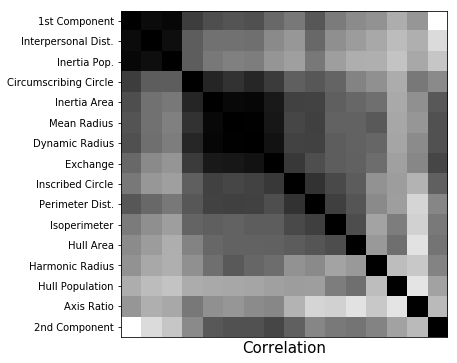

In [6]:
cols = ['obj_pca1', 'obj_ip_dist', 'obj_inertia_p', 'obj_scc', 'obj_inertia_a', 'obj_mean_radius', 
        'obj_dyn_radius', "obj_exchange", 'obj_lic', 'obj_rohrbach', 'obj_polsby', 'obj_hull_area', 'obj_harm_radius', 'obj_hull_pop', 
        'obj_axis', 'obj_pca2']

names = ["1st Component", "Interpersonal Dist.", "Inertia Pop.", "Circumscribing Circle", "Inertia Area", "Mean Radius", 
         'Dynamic Radius', "Exchange", "Inscribed Circle", "Perimeter Dist.", "Isoperimeter", "Hull Area", "Harmonic Radius", "Hull Population",  
         "Axis Ratio", "2nd Component"]

correlations = c[cols].corr()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

cax = ax.matshow(np.abs(correlations), vmin=0, vmax=1, cmap = "gray_r")

divider = make_axes_locatable(ax)
# caxd = divider.append_axes("right", size="5%", pad=0.15)
# fig.colorbar(cax, cax=caxd)

ticks = np.arange(0,len(cols),1)
ax.set_xlabel("Correlation", size = 15)
ax.set_xticks([])
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

ax.get_figure().savefig("historic_correlation.pdf", bbox_inches='tight', pad_inches=0.1)

In [7]:
correlations

,obj_pca1,obj_ip_dist,obj_inertia_p,obj_scc,obj_inertia_a,obj_mean_radius,obj_dyn_radius,obj_exchange,obj_lic,obj_rohrbach,obj_polsby,obj_hull_area,obj_harm_radius,obj_hull_pop,obj_axis,obj_pca2
obj_pca1,1.000000e+00,0.954992,0.972206,0.758639,0.693475,0.670961,0.685353,0.593505,0.527348,0.659745,0.515842,0.453473,0.429679,0.323884,0.413912,5.705224e-18
obj_ip_dist,9.549916e-01,1.000000,0.943981,0.635023,0.556391,0.553176,0.563291,0.457870,0.406913,0.593516,0.438479,0.386961,0.343444,0.264346,0.313491,1.420450e-01
obj_inertia_p,9.722057e-01,0.943981,1.000000,0.633479,0.528841,0.498283,0.510882,0.416577,0.376644,0.528587,0.381292,0.317696,0.313900,0.238027,0.340565,2.246718e-01
obj_scc,7.586392e-01,0.635023,0.633479,1.000000,0.853856,0.797112,0.849453,0.765651,0.627573,0.658125,0.606066,0.485083,0.434644,0.324724,0.530713,-4.589146e-01
obj_inertia_a,6.934753e-01,0.556391,0.528841,0.853856,1.000000,0.963293,0.974998,0.897591,0.745318,0.734741,0.628620,0.594407,0.562771,0.336505,0.436986,-6.561568e-01
obj_mean_radius,6.709605e-01,0.553176,0.498283,0.797112,0.963293,1.000000,0.990255,0.907314,0.724832,0.746898,0.610035,0.609627,0.644798,0.345677,0.410673,-6.784408e-01
obj_dyn_radius,6.853531e-01,0.563291,0.510882,0.849453,0.974998,0.990255,1.000000,0.922458,0.734941,0.744119,0.633312,0.611351,0.600454,0.355380,0.453134,-6.816443e-01
obj_exchange,5.935046e-01,0.457870,0.416577,0.765651,0.897591,0.907314,0.922458,1.000000,0.773863,0.692310,0.634743,0.615399,0.571444,0.371388,0.472128,-7.234227e-01
obj_lic,5.273478e-01,0.406913,0.376644,0.627573,0.745318,0.724832,0.734941,0.773863,1.000000,0.798696,0.711300,0.639272,0.429107,0.384823,0.298532,-6.248382e-01
obj_rohrbach,6.597447e-01,0.593516,0.528587,0.658125,0.734741,0.746898,0.744119,0.692310,0.798696,1.000000,0.750049,0.664339,0.457143,0.379366,0.166915,-4.763163e-01


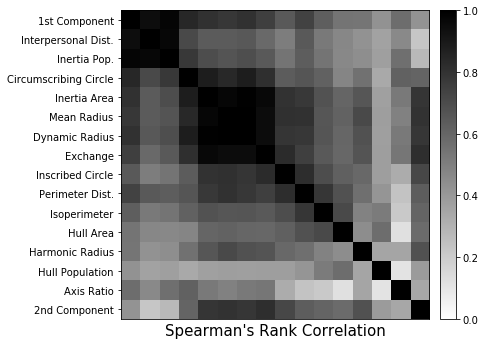

In [38]:
spcorr = c[cols].corr(method = "spearman")

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(np.abs(spcorr), vmin=0, vmax=1, cmap = "gray_r")

divider = make_axes_locatable(ax)
caxd = divider.append_axes("right", size="5%", pad=0.15)
fig.colorbar(cax, cax=caxd)

ticks = np.arange(0,len(cols),1)
ax.set_xlabel("Spearman's Rank Correlation", size = 15)
ax.set_xticks([])
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(names)
plt.show()

ax.get_figure().savefig("historic_spearmans.pdf", bbox_inches='tight', pad_inches=0.1)

In [39]:
c = gpd.read_file("decennial_compactness.shp")

pca = PCA(n_components = 2)
pca.fit(c.filter(regex = "^obj"))

obj_cols = list(c.filter(regex = "^obj").columns)
c['obj_pca1'] = pca.transform(c[obj_cols])[:,0]
c['obj_pca2'] = pca.transform(c[obj_cols])[:,1]

pd.options.display.max_columns = 100

cols = list(c.filter(regex = "^obj").columns)
c[c.year == 2010].sort_values(by = "obj_pca1", ascending = True).reset_index()[['usps', 'cd', 'year', 'congress'] + cols]

,usps,cd,year,congress,obj_axis,obj_dyn_ra,obj_harm_r,obj_hull_a,obj_hull_p,obj_iner_1,obj_inerti,obj_ip_dis,obj_lic,obj_mean_r,obj_polsby,obj_rohrba,obj_scc,obj_pca1,obj_pca2
0,NC,12,2010,114,0.026780,0.309563,0.478799,0.249931,0.409797,0.069804,0.090944,0.310576,0.076874,0.322113,0.030455,0.218597,0.075737,-1.428145,0.790435
1,OH,9,2010,114,0.005466,0.306280,0.813148,0.554415,0.632188,0.048557,0.100508,0.246838,0.098734,0.350742,0.038437,0.266564,0.057094,-1.387870,0.537180
2,FL,5,2010,114,0.042168,0.429493,0.574790,0.286059,0.330266,0.083048,0.201684,0.315223,0.093387,0.462493,0.039870,0.276483,0.100401,-1.338390,0.621346
3,NY,10,2010,114,0.026612,0.361098,0.417531,0.434102,0.389464,0.113109,0.131973,0.373565,0.117431,0.372312,0.076937,0.320920,0.104140,-1.313487,0.694777
4,TX,35,2010,114,0.012738,0.384845,0.625423,0.364177,0.444744,0.088063,0.134891,0.353801,0.164879,0.439062,0.056027,0.412243,0.101185,-1.297601,0.573132
5,HI,2,2010,114,0.023765,0.296678,0.343578,0.965851,0.498477,0.093948,0.087771,0.343898,0.416271,0.339472,0.081139,0.530970,0.054400,-1.275506,0.496881
6,FL,22,2010,114,0.035331,0.400244,0.669790,0.458124,0.420148,0.155312,0.157550,0.432778,0.133099,0.438825,0.074099,0.279545,0.109869,-1.208047,0.593955
7,WV,2,2010,114,0.018705,0.511162,0.760887,0.583987,0.711031,0.148497,0.260942,0.441551,0.197825,0.547403,0.097976,0.423197,0.182096,-1.081491,0.288222
8,VA,3,2010,114,0.022025,0.600170,0.726486,0.556758,0.560831,0.129158,0.359150,0.414799,0.217746,0.681416,0.078441,0.506322,0.174912,-1.068629,0.197189
9,TX,15,2010,114,0.010183,0.509351,0.616890,0.521126,0.577579,0.153766,0.257994,0.544136,0.178691,0.548789,0.126254,0.649394,0.151253,-1.042336,0.347451


/home/jsaxon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


usps      NC
cd        12
year    2010
Name: 1148, dtype: object

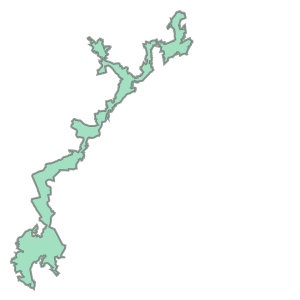

usps      OH
cd         9
year    2010
Name: 1158, dtype: object

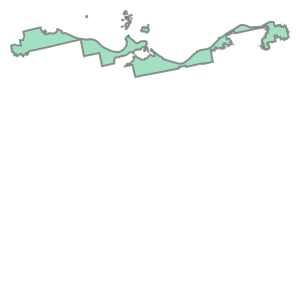

usps      FL
cd         5
year    2010
Name: 945, dtype: object

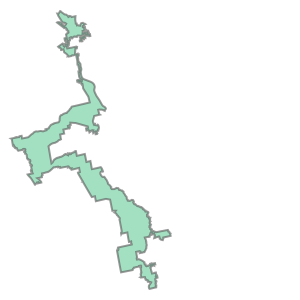

usps      NY
cd        10
year    2010
Name: 1119, dtype: object

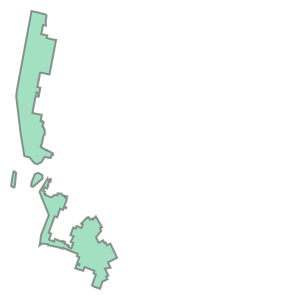

usps      TX
cd        35
year    2010
Name: 1246, dtype: object

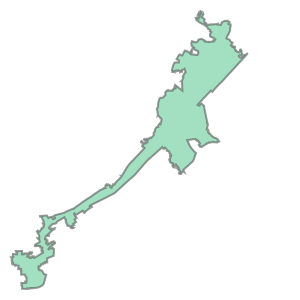

usps      HI
cd         2
year    2010
Name: 983, dtype: object

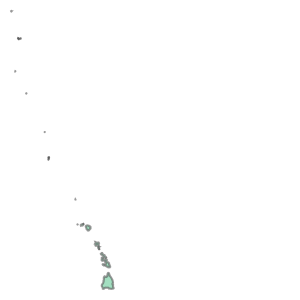

usps      FL
cd        22
year    2010
Name: 962, dtype: object

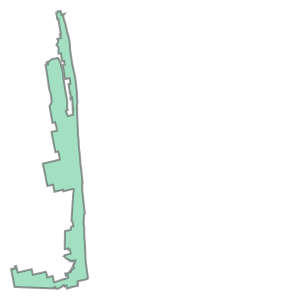

usps      WV
cd         2
year    2010
Name: 1274, dtype: object

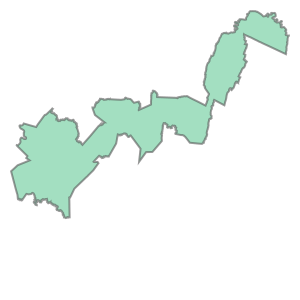

usps      VA
cd         3
year    2010
Name: 1254, dtype: object

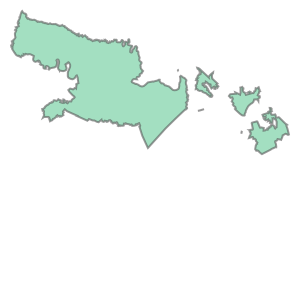

usps      TX
cd        15
year    2010
Name: 1226, dtype: object

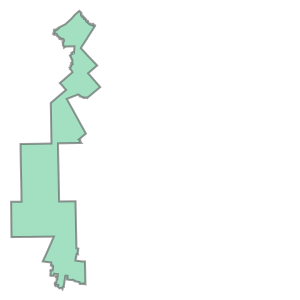

usps      TX
cd        14
year    2010
Name: 1225, dtype: object

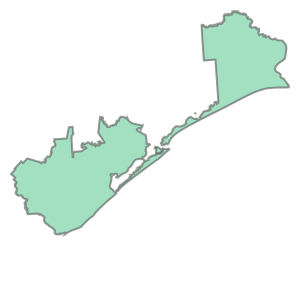

usps      TX
cd        28
year    2010
Name: 1239, dtype: object

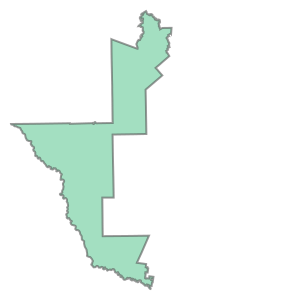

usps      TX
cd        33
year    2010
Name: 1244, dtype: object

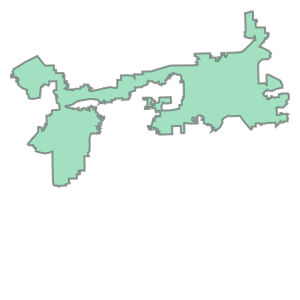

usps      MD
cd         6
year    2010
Name: 1040, dtype: object

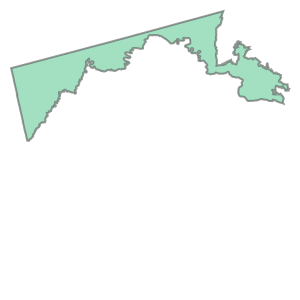

usps      NC
cd         4
year    2010
Name: 1140, dtype: object

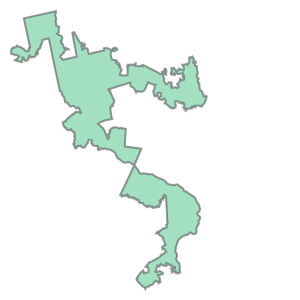

usps      NY
cd         7
year    2010
Name: 1116, dtype: object

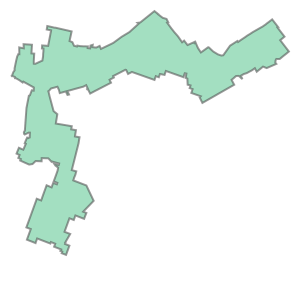

usps      LA
cd         2
year    2010
Name: 1028, dtype: object

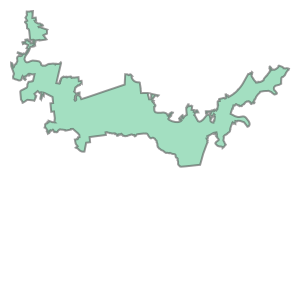

usps      MD
cd         3
year    2010
Name: 1037, dtype: object

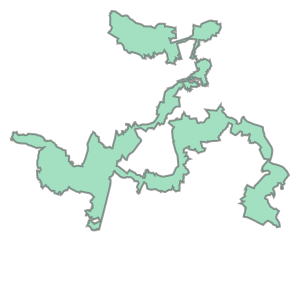

usps      MI
cd        14
year    2010
Name: 1065, dtype: object

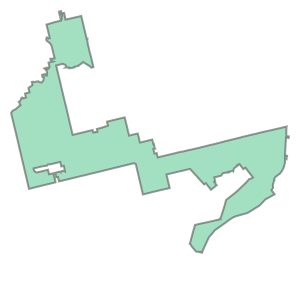

usps      OH
cd         6
year    2010
Name: 1155, dtype: object

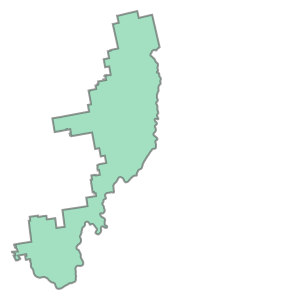

usps      SC
cd         1
year    2010
Name: 1196, dtype: object

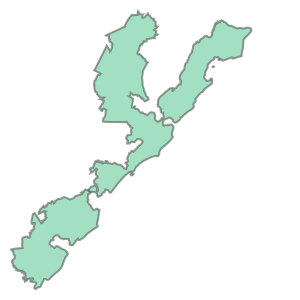

usps      PA
cd        12
year    2010
Name: 1187, dtype: object

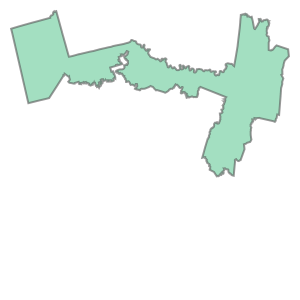

usps      TX
cd        34
year    2010
Name: 1245, dtype: object

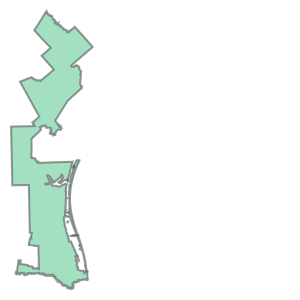

usps      PA
cd        15
year    2010
Name: 1190, dtype: object

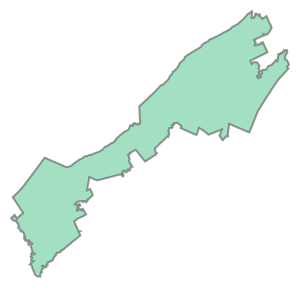

usps      CA
cd         2
year    2010
Name: 877, dtype: object

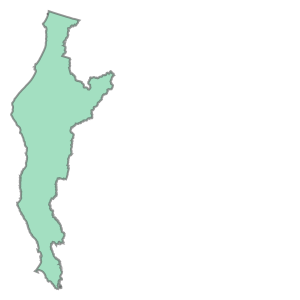

In [40]:
for idx in c[c.year == 2010].sort_values(by = "obj_pca1", ascending = True).head(25).index:
    display(c[["usps", "cd", "year"]].ix[idx], c.ix[idx].geometry)